In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
car_sales = pd.read_csv('../Data/car-sales/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [4]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [5]:
car_sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [6]:
car_sales.describe()

,Odometer (KM),Doors,Price
count,1000.000000,1000.000000,1000.000000
mean,131073.708000,4.014000,16045.665000
std,68859.723885,0.379405,8630.794219
min,10148.000000,3.000000,2796.000000
25%,71238.000000,4.000000,9481.500000
50%,131202.000000,4.000000,14264.000000
75%,192372.750000,4.000000,20738.750000
max,249860.000000,5.000000,52458.000000


In [7]:
X = car_sales.drop('Price', axis=1)
Y = car_sales['Price']

In [8]:
# Check car for categorical data

car_sales['Doors'].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [9]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']

one_hot = OneHotEncoder()

transformer = ColumnTransformer([('one_hot', 
                                   one_hot,
                                   categorical_features)],
                                   remainder='passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [10]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [11]:
# Let's refit the model

from sklearn.model_selection import train_test_split

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_X,
                                                    Y,
                                                    test_size=0.2)


In [12]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(x_train, y_train)
model.score(x_test, y_test)

0.3235867221569877

## Handling missing values, using imputer

In [13]:
car_sales_missing = pd.read_csv('../Data/car-sales/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [14]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [15]:
X = car_sales_missing.drop(['Price'], axis=1)
Y = car_sales_missing['Price']

In [16]:
# Handling missing values

car_sales_missing['Make'].fillna("missing", inplace=True)
car_sales_missing['Colour'].fillna("missing", inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
car_sales_missing["Doors"].fillna(4, inplace=True)

In [17]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [18]:
# Remove rows with Price values missing
car_sales_missing.dropna(inplace=True)

In [19]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [20]:
len(car_sales_missing)

950

In [21]:
X = car_sales_missing.drop(['Price'], axis=1)
Y = car_sales_missing['Price']

In [22]:
# Convert categorical to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']

one_hot = OneHotEncoder()

transformer = ColumnTransformer(transformers=[('one_hot',
                                                one_hot,
                                                categorical_features)],
                                                remainder='passthrough')

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [23]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


## Option 2 fill missing values with scikit-learn

In [24]:
car_sales_missing = pd.read_csv('../Data/car-sales/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [25]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [26]:
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [27]:
X = car_sales_missing.drop(['Price'], axis=1)
Y = car_sales_missing['Price']

In [28]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy="constant", fill_value='missing')
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

cat_features = ['Make', 'Colour']
door_feature = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer

imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_features)
])

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [29]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])

car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [30]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [31]:
# Convert categorical to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']

one_hot = OneHotEncoder()

transformer = ColumnTransformer(transformers=[('one_hot',
                                                one_hot,
                                                categorical_features)],
                                                remainder='passthrough')

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [32]:
# Let's fit the model

np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_X, Y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21990196728583944

## Choosing the right estimator or algorithm

In [33]:
from sklearn.datasets import load_boston

boston = load_boston()
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

c:\Users\Rajesh\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [34]:
len(boston_df)

506

In [35]:
# Ridge Regression model

from sklearn.linear_model import Ridge

np.random.seed(42)

x = boston_df.drop(['target'], axis=1)
y = boston_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

ridge = Ridge()

ridge.fit(x_train, y_train)
ridge.score(x_test, y_test)


0.6662221670168518

In [51]:
# Improving the model
# Let's try RandomForestREgressor

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop(['target'], axis=1)
y = boston_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

rf = RandomForestRegressor()

rf.fit(x_train, y_train)
rf.score(x_test, y_test)


0.8654448653350507

## Choosing an estimator for classification problem

In [37]:
heart_disease = pd.read_csv('../Data/heart-disease/heart.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [42]:
# Let's try LinearSVC

from sklearn.svm import LinearSVC

np.random.seed(42)

x = heart_disease.drop(['target'], axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

lsvc = LinearSVC()
lsvc.fit(x_train, y_train)

lsvc.score(x_test, y_test)

c:\Users\Rajesh\miniconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [43]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [45]:
# Let's try RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop(['target'], axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc.score(x_test, y_test)

0.8524590163934426

In [46]:
# Make predictions using trained machine learning model. 
# Compare predictions to truth labels to evaluate the model

y_preds = rfc.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [47]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

0.8524590163934426

In [50]:
# Make predictions with predict_proba

y_preds_proba = rfc.predict_proba(x_test)
y_preds_proba[:5]



array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [54]:
# Predict a regression problem

y_preds = ridge.predict(x_test)
y_preds[:10]


array([28.69407967, 35.69624973, 14.14604677, 24.77692904, 19.12179357,
       22.3570209 , 17.58912087, 14.21475184, 22.12847122, 20.77279132])

In [63]:
y_test.iloc[0:10]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
76     20.0
316    17.8
140    14.0
471    19.6
500    16.8
Name: target, dtype: float64

In [56]:
# Compare the predictions to the truth 

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

3.1329474278055294

## Evaluating a machine learning model
Three ways to evaluate scikit-learn models/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions

In [66]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop(['target'], axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

rfc.score(x_test, y_test)

0.8524590163934426

In [67]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop(['target'], axis=1)
y = boston_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

rf = RandomForestRegressor()

rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.8654448653350507

# Evaluating a model using the scoring parameter 

In [69]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop(['target'], axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

rfc.score(x_test, y_test)


0.8524590163934426

In [71]:
cross_val_score(rfc, x, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [73]:
np.random.seed(42)

rfc_single_score = rfc.score(x_test, y_test)

rfc_cross_score = np.mean(cross_val_score(rfc, x, y, cv=5))

rfc_single_score, rfc_cross_score

(0.8524590163934426, 0.8248087431693989)

# Classification model evaluation metrics
1. Accuracy 
2. Area under ROC curve
3. Confusion matrix
4.  Classification Report

**1. Accuracy**

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop(['target'], axis=1)
y = heart_disease['target']

rfc = RandomForestClassifier()

cross_val_score = cross_val_score(rfc, x, y, cv=5)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [77]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**2. Area under receiver operating characteristic curve (AUC/ROC)**

* Area Under Curve (AUC)
* ROC Curve

ROC curves are a comparison of a model's true positive rate (tpr) versus the model's false positive rate (fpr)

In [83]:
from sklearn.metrics import roc_curve

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

rfc.fit(x_train, y_train)

y_probs = rfc.predict_proba(x_test)
y_probs[:10], len(y_probs)

(array([[0.42, 0.58],
        [0.93, 0.07],
        [0.63, 0.37],
        [0.52, 0.48],
        [0.44, 0.56],
        [0.68, 0.32],
        [0.07, 0.93],
        [0.28, 0.72],
        [0.42, 0.58],
        [0.16, 0.84]]),
 61)

In [86]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.58, 0.07, 0.37, 0.48, 0.56, 0.32, 0.93, 0.72, 0.58, 0.84])

In [87]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

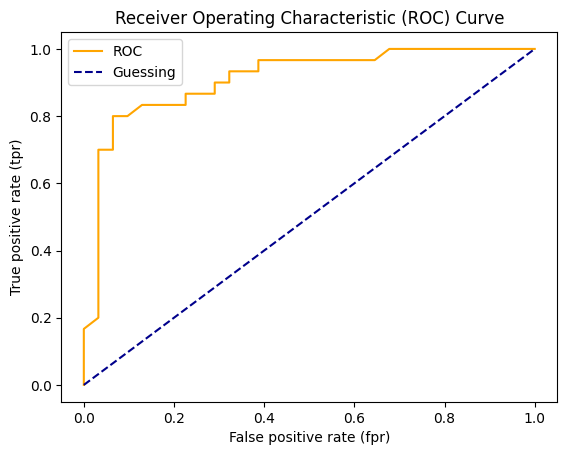

In [88]:
# Create a function for plotting ROC curve

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC curve
    '''
    plt.plot(fpr, tpr, color="orange", label='ROC')
    plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='Guessing')

    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)



In [89]:
from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test, y_probs_positive)
roc_auc_score

0.9102150537634409

### Confusion Matrix

In [90]:
from sklearn.metrics import confusion_matrix


y_preds = rfc.predict(x_test)
confusion_matrix = confusion_matrix(y_test, y_preds)

array([[24,  7],
       [ 5, 25]], dtype=int64)

<AxesSubplot: >

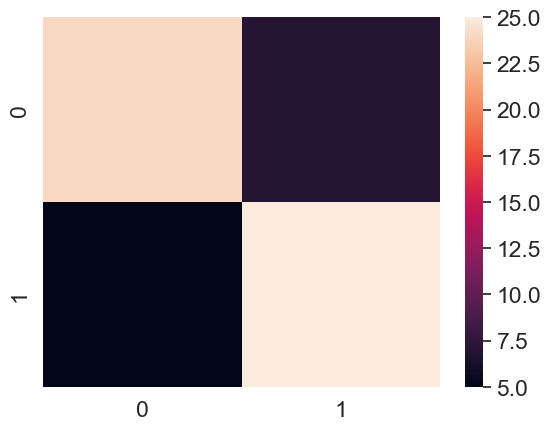

In [91]:
import seaborn as sns

confusion_matrix = confusion_matrix(y_test, y_preds)

sns.set(font_scale=1.5)

sns.heatmap(confusion_matrix)

### Classification Report

In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        31
           1       0.78      0.83      0.81        30

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



To summarize classification matrics

* **Accuracy**  is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision**  and **Recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false negatives, aim for higher recall.
* **F1 score** is a combination of precision and recall.